In [1]:
from smart_open import open
import json
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt

In [2]:
ligand_info = json.load(open("../peptides/positive_control_ligands.json"))
ranking_confidence_scores_pos = []
for row in pd.read_csv("positive_control_receptors_ligand_pairs.tsv", index_col=0).iterrows():
    ligand = row[1]["Prey_UniProt_Name"] + "_HUMAN"
    receptor = row[1]["Bait_UniProt_Name"] + "_HUMAN"
    ligand_start, ligand_end = ligand_info[ligand][0]
    experiment_name = f"{receptor}_{ligand}_{ligand_start}_{ligand_end}_13982528712754416"
    with open(f"s3://velia-af2-dev/outputs/{experiment_name}/{experiment_name}.model_1_multimer_v3_pred_0.scores.json") as f:
        ranking_confidence = json.load(f)["ranking_confidence"]
        ranking_confidence_scores_pos.append(ranking_confidence)

In [3]:
len(ranking_confidence_scores_pos)

75

In [4]:
ranking_confidence_scores_neg = []
for row in pd.read_csv("../code/positive_control_receptors_simplified.tsv", index_col=0).iterrows():
    receptor = row[1]["Entry Name"]
    for ligand, coordinates in json.load(open("../peptides/20240718_negative_control_intracellular_fragments.json")).items():
        #if ligand in ["NOTC3_HUMAN", "SH3K1_HUMAN"]:
        #    continue
        for (ligand_start, ligand_end) in coordinates:
            experiment_name = f"{receptor}_{ligand}_{ligand_start}_{ligand_end}_13982528712754416"
            try:
                with open(f"s3://velia-af2-dev/outputs/{experiment_name}/{experiment_name}.model_1_multimer_v3_pred_0.scores.json") as f:
                    ranking_confidence = json.load(f)["ranking_confidence"]
                    ranking_confidence_scores_neg.append(ranking_confidence)
            except:
                print(experiment_name)

TARM1_HUMAN_NOTC3_HUMAN_308_321_13982528712754416
TARM1_HUMAN_NOTC3_HUMAN_451_458_13982528712754416
TARM1_HUMAN_NOTC3_HUMAN_945_945_13982528712754416
TARM1_HUMAN_SH3K1_HUMAN_597_626_13982528712754416
NCHL1_HUMAN_NOTC3_HUMAN_308_321_13982528712754416
NCHL1_HUMAN_NOTC3_HUMAN_451_458_13982528712754416
NCHL1_HUMAN_NOTC3_HUMAN_945_945_13982528712754416
NCHL1_HUMAN_SH3K1_HUMAN_597_626_13982528712754416
DLL1_HUMAN_NOTC3_HUMAN_308_321_13982528712754416
DLL1_HUMAN_NOTC3_HUMAN_451_458_13982528712754416
DLL1_HUMAN_NOTC3_HUMAN_945_945_13982528712754416
DLL1_HUMAN_SH3K1_HUMAN_597_626_13982528712754416
NCTR3_HUMAN_NOTC3_HUMAN_308_321_13982528712754416
NCTR3_HUMAN_NOTC3_HUMAN_451_458_13982528712754416
NCTR3_HUMAN_NOTC3_HUMAN_945_945_13982528712754416
NCTR3_HUMAN_SH3K1_HUMAN_597_626_13982528712754416
TNF12_HUMAN_NOTC3_HUMAN_308_321_13982528712754416
TNF12_HUMAN_NOTC3_HUMAN_451_458_13982528712754416
TNF12_HUMAN_NOTC3_HUMAN_945_945_13982528712754416
TNF12_HUMAN_SH3K1_HUMAN_597_626_13982528712754416
MPZL

In [5]:
for row in pd.read_csv("../code/positive_control_receptors_simplified.tsv", index_col=0).iterrows():
    #ligand = row[1]["Prey_UniProt_Name"] + "_HUMAN"
    receptor = row[1]["Entry Name"]
    for ligand, coordinates in json.load(open("../peptides/20240718_negative_control_secreted_fragments.json")).items():
        for (ligand_start, ligand_end) in coordinates:
            experiment_name = f"{receptor}_{ligand}_{ligand_start}_{ligand_end}_13982528712754416"
            try:
                with open(f"s3://velia-af2-dev/outputs/{experiment_name}/{experiment_name}.model_1_multimer_v3_pred_0.scores.json") as f:
                    ranking_confidence = json.load(f)["ranking_confidence"]
                    ranking_confidence_scores_neg.append(ranking_confidence)
            except:
                print(experiment_name)

In [6]:
len(ranking_confidence_scores_neg)

2888

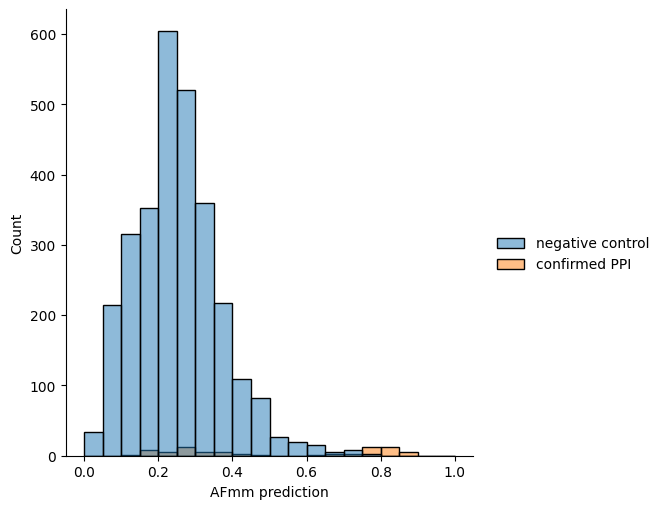

In [20]:
#sns.displot({"negative control": ranking_confidence_scores_neg, "confirmed PPI": ranking_confidence_scores_pos})

#fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
#sns.histplot(ranking_confidence_scores_neg, kde=False, ax=ax1, bins=20, binrange=(0, 1), color="cornflowerblue", label="negative control")
ax1 = sns.displot({"negative control": ranking_confidence_scores_neg, "confirmed PPI": ranking_confidence_scores_pos},
                  bins=20, binrange=(0, 1))
ax1.set(ylabel='Count', xlabel='AFmm prediction')

#sns.histplot(ranking_confidence_scores_pos, ax=ax2, bins=20, binrange=(0, 1), color="salmon", label="confirmed PPI")
#ax2.set(ylabel='Count - confirmed PPI')

#lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
#ax1.legend(lines + lines2, labels + labels2,  bbox_to_anchor=(1.5, 1))


plt.show()

In [8]:
data_x, data_y = [], []
for confidence in ranking_confidence_scores_neg:
    data_x.append(0)
    data_y.append(confidence)

for confidence in ranking_confidence_scores_pos:
    data_x.append(1)
    data_y.append(confidence)

In [9]:
precision_vals, recall_vals, thresholds = precision_recall_curve(data_x, data_y)

<Axes: xlabel='precision', ylabel='recall'>

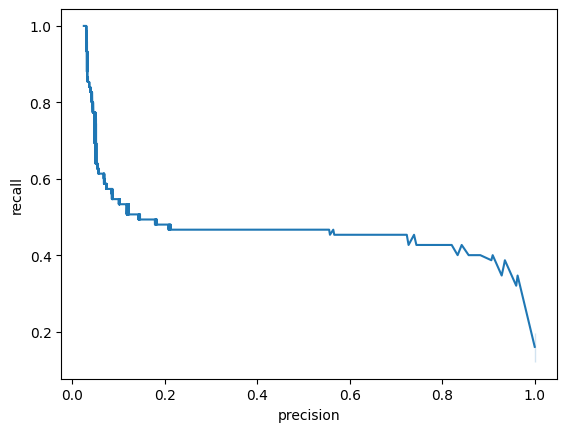

In [10]:
sns.lineplot({"precision": precision_vals, "recall": recall_vals}, x="precision", y="recall")

In [11]:
precision_vals[-50:], recall_vals[-50:], thresholds[-50:]

(array([0.69387755, 0.70833333, 0.72340426, 0.73913043, 0.73333333,
        0.72727273, 0.74418605, 0.76190476, 0.7804878 , 0.8       ,
        0.82051282, 0.84210526, 0.83783784, 0.83333333, 0.85714286,
        0.88235294, 0.90909091, 0.90625   , 0.93548387, 0.93333333,
        0.93103448, 0.92857143, 0.96296296, 0.96153846, 0.96      ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 array([0.45333333, 0.45333333, 0.45333333, 0.45333333, 0.44      ,
        0.42666667, 0.42666667, 0.42666667, 0.42666667, 0.42666667,
        0.42666667, 0.42666667, 0.41333333, 0.4       , 0.4       ,
        0.4       , 0.4       , 0.38666667, 0.38666667, 0.37333333,
        0.36      , 0.34666667, 0.34666667, 0.

In [12]:
print("precision: %.3f\trecall: %.3f\tthreshold: %.3f" %(precision_vals[-41], recall_vals[-41], thresholds[-41]))
print("precision: %.3f\trecall: %.3f\tthreshold: %.3f" %(precision_vals[-34], recall_vals[-34], thresholds[-34]))
print("precision: %.3f\trecall: %.3f\tthreshold: %.3f" %(precision_vals[-28], recall_vals[-28], thresholds[-28]))

precision: 0.800	recall: 0.427	threshold: 0.711
precision: 0.909	recall: 0.400	threshold: 0.749
precision: 0.963	recall: 0.347	threshold: 0.773
